In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("mushrooms.csv")

y = data['class']
x = data.drop(['class', 'veil-type','stalk-root'], axis=1)

In [3]:
columns = np.array(['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'])

# Eksplorasi Data

In [4]:
data.describe().transpose()

,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


<BarContainer object of 2 artists>

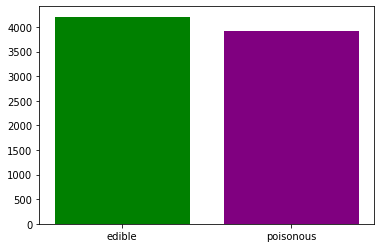

In [5]:
plt.bar(['edible', 'poisonous'], data['class'].value_counts(), color=["green", "purple"])

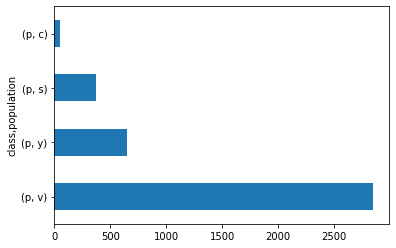

In [6]:
pop = pd.DataFrame({'class' : data['class'], 'population' : data['population']})
pop[pop['class'] == 'p'].value_counts().plot(kind='barh')

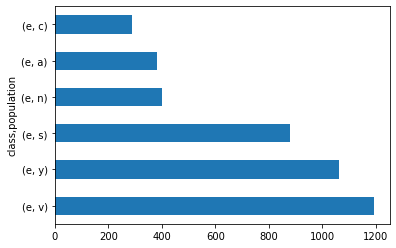

In [7]:
pop[pop['class'] == 'e'].value_counts().plot(kind='barh')

In [8]:
data['stalk-surface-above-ring'].value_counts()

s    5176
k    2372
f     552
y      24
Name: stalk-surface-above-ring, dtype: int64

In [9]:
data['population']

0       s
1       n
2       n
3       s
4       a
       ..
8119    c
8120    v
8121    c
8122    v
8123    c
Name: population, Length: 8124, dtype: object

# Preprocess Data

## Feature Selection

### Label Encoding

In [10]:
pd.DataFrame(data.isnull().sum())

,0
class,0
cap-shape,0
cap-surface,0
cap-color,0
bruises,0
odor,0
gill-attachment,0
gill-spacing,0
gill-size,0
gill-color,0


In [11]:
from sklearn.preprocessing import LabelEncoder

le = data.apply(LabelEncoder().fit_transform)
le.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


### SelectKBest

In [12]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_regression

In [13]:
yle = le['class']
xle = le.drop(['class', 'veil-type','stalk-root'], axis=1)

In [14]:
select = SelectKBest(score_func=chi2).fit(xle,yle)
z = select.transform(xle)
filter = select.get_support()
columns[filter]

array(['cap-surface', 'bruises', 'gill-spacing', 'gill-size',
       'gill-color', 'stalk-surface-above-ring', 'ring-type',
       'spore-print-color', 'population', 'habitat'], dtype='<U24')

In [15]:
pd.DataFrame({'variable': columns,
              'score_chi2': select.scores_}).sort_values(ascending=False, by='score_chi2').reset_index(drop=True)

,variable,score_chi2
0,gill-color,5957.764469
1,ring-type,1950.610146
2,gill-size,1636.606833
3,bruises,1194.277352
4,gill-spacing,826.795274
5,habitat,751.309489
6,spore-print-color,379.132729
7,population,311.766736
8,stalk-surface-above-ring,222.982400
9,cap-surface,214.068544


## Correlation

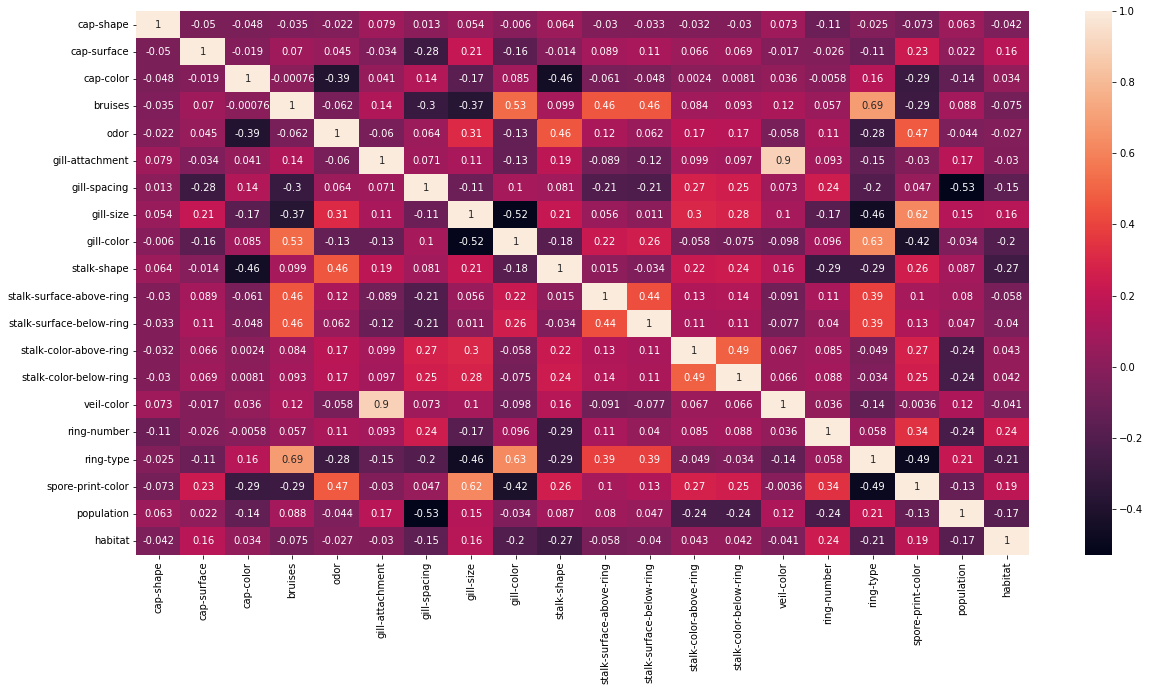

In [16]:
plt.figure(figsize=(20,10))
sns.heatmap(xle.corr(), annot=True)

### One Hot Encoder

In [17]:
y = data['class']
x = data.drop(['class', 'veil-type'], axis=1)

feature = columns[filter]
selected = x[feature]
selected

,cap-surface,bruises,gill-spacing,gill-size,gill-color,stalk-surface-above-ring,ring-type,spore-print-color,population,habitat
0,s,t,c,n,k,s,p,k,s,u
1,s,t,c,b,k,s,p,n,n,g
2,s,t,c,b,n,s,p,n,n,m
3,y,t,c,n,n,s,p,k,s,u
4,s,f,w,b,k,s,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...
8119,s,f,c,b,y,s,p,b,c,l
8120,s,f,c,b,y,s,p,b,v,l
8121,s,f,c,b,n,s,p,b,c,l
8122,y,f,c,n,b,s,e,w,v,l


In [18]:
ohe = pd.get_dummies(selected, columns=feature)
ohe.columns

Index(['cap-surface_f', 'cap-surface_g', 'cap-surface_s', 'cap-surface_y',
       'bruises_f', 'bruises_t', 'gill-spacing_c', 'gill-spacing_w',
       'gill-size_b', 'gill-size_n', 'gill-color_b', 'gill-color_e',
       'gill-color_g', 'gill-color_h', 'gill-color_k', 'gill-color_n',
       'gill-color_o', 'gill-color_p', 'gill-color_r', 'gill-color_u',
       'gill-color_w', 'gill-color_y', 'stalk-surface-above-ring_f',
       'stalk-surface-above-ring_k', 'stalk-surface-above-ring_s',
       'stalk-surface-above-ring_y', 'ring-type_e', 'ring-type_f',
       'ring-type_l', 'ring-type_n', 'ring-type_p', 'spore-print-color_b',
       'spore-print-color_h', 'spore-print-color_k', 'spore-print-color_n',
       'spore-print-color_o', 'spore-print-color_r', 'spore-print-color_u',
       'spore-print-color_w', 'spore-print-color_y', 'population_a',
       'population_c', 'population_n', 'population_s', 'population_v',
       'population_y', 'habitat_d', 'habitat_g', 'habitat_l', 'habitat_m',


In [19]:
ohe

,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,bruises_f,bruises_t,gill-spacing_c,gill-spacing_w,gill-size_b,gill-size_n,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,1,0,0,1,1,0,0,1,...,1,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,1,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,1,0,0,1,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,1,0,1,1,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,1,0,1,0,0,1,1,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,1,0,1,0,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8120,0,0,1,0,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,0,0
8121,0,0,1,0,1,0,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8122,0,0,0,1,1,0,1,0,0,1,...,0,1,0,0,0,1,0,0,0,0


In [20]:
ohe.shape

(8124, 53)

# Classification

## Decision Tree

([<matplotlib.patches.Wedge at 0x7fa9f1a22850>,
 [Text(0.6465637441936395, 0.8899187180267095, 'test'),
  Text(-0.6465637441936395, -0.8899187180267095, 'train')])

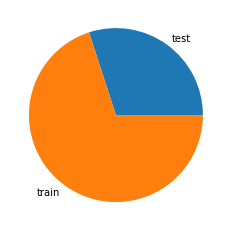

In [21]:
plt.pie([30,70],
        labels=['test', 'train'])

In [22]:
y = yle
x = ohe

from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2)

parameters = {'splitter' : ['best', 'random'],
              'criterion' :['gini', 'entropy'],
              'min_samples_split':[2, 3, 4, 5], 
              'max_depth':[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
              'class_weight':('balanced', None),
             }

tr = tree.DecisionTreeClassifier()
gsearch = GridSearchCV(tr, parameters)
gsearch.fit(X_train, y_train)
model = gsearch.best_estimator_
model

DecisionTreeClassifier(class_weight='balanced', max_depth=12)

In [23]:
gsearch.best_index_

88

In [24]:
pd.DataFrame(gsearch.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_class_weight,param_criterion,param_max_depth,param_min_samples_split,param_splitter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.007519,0.000612,0.002034,0.000063,balanced,gini,1,2,best,"{'class_weight': 'balanced', 'criterion': 'gin...",0.766257,0.779244,0.770449,0.773967,0.795954,0.777174,0.010312,353
1,0.008395,0.002290,0.002432,0.000888,balanced,gini,1,2,random,"{'class_weight': 'balanced', 'criterion': 'gin...",0.766257,0.779244,0.770449,0.773967,0.795954,0.777174,0.010312,353
2,0.007091,0.000102,0.002098,0.000212,balanced,gini,1,3,best,"{'class_weight': 'balanced', 'criterion': 'gin...",0.766257,0.779244,0.770449,0.773967,0.795954,0.777174,0.010312,353
3,0.007299,0.000134,0.002040,0.000034,balanced,gini,1,3,random,"{'class_weight': 'balanced', 'criterion': 'gin...",0.766257,0.779244,0.770449,0.773967,0.795954,0.777174,0.010312,353
4,0.006993,0.000059,0.001957,0.000037,balanced,gini,1,4,best,"{'class_weight': 'balanced', 'criterion': 'gin...",0.766257,0.779244,0.770449,0.773967,0.795954,0.777174,0.010312,353
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,0.010785,0.000508,0.002736,0.000081,None,entropy,12,3,random,"{'class_weight': None, 'criterion': 'entropy',...",1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1
380,0.009797,0.000134,0.002642,0.000137,None,entropy,12,4,best,"{'class_weight': None, 'criterion': 'entropy',...",1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1
381,0.010135,0.000127,0.002791,0.000248,None,entropy,12,4,random,"{'class_weight': None, 'criterion': 'entropy',...",1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1
382,0.009257,0.000078,0.002198,0.000035,None,entropy,12,5,best,"{'class_weight': None, 'criterion': 'entropy',...",1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1


In [25]:
X_train.shape
X_test.shape

(2438, 53)

In [26]:
fitur = model.feature_names_in_
importance = model.feature_importances_

fitur_importance = {'Fitur': fitur, 'Importance Values': importance}
fitur_importance_df = pd.DataFrame(data=fitur_importance)
fitur_importance_df.sort_values(by=['Importance Values'], ascending=False)

,Fitur,Importance Values
23,stalk-surface-above-ring_k,3.495550e-01
8,gill-size_b,3.082612e-01
32,spore-print-color_h,1.342399e-01
30,ring-type_p,6.426672e-02
0,cap-surface_f,3.285508e-02
36,spore-print-color_r,3.184627e-02
27,ring-type_f,1.675215e-02
4,bruises_f,1.591640e-02
6,gill-spacing_c,1.566551e-02
46,habitat_d,1.440731e-02


In [27]:
score = model.score(X_test, y_test)
score

1.0

In [28]:
import graphviz
dot_data = tree.export_graphviz(model, out_file=None,
                                feature_names=X_test.columns,
                                class_names=['edible', 'poisonous'],
                                filled=True, rounded=True,
                                special_characters=True)
graph = graphviz.Source(dot_data, format="png")
graph

plt.savefig("abc1.png", transparent=True)
#graph.render("decision_tree_graphivz")

<Figure size 432x288 with 0 Axes>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

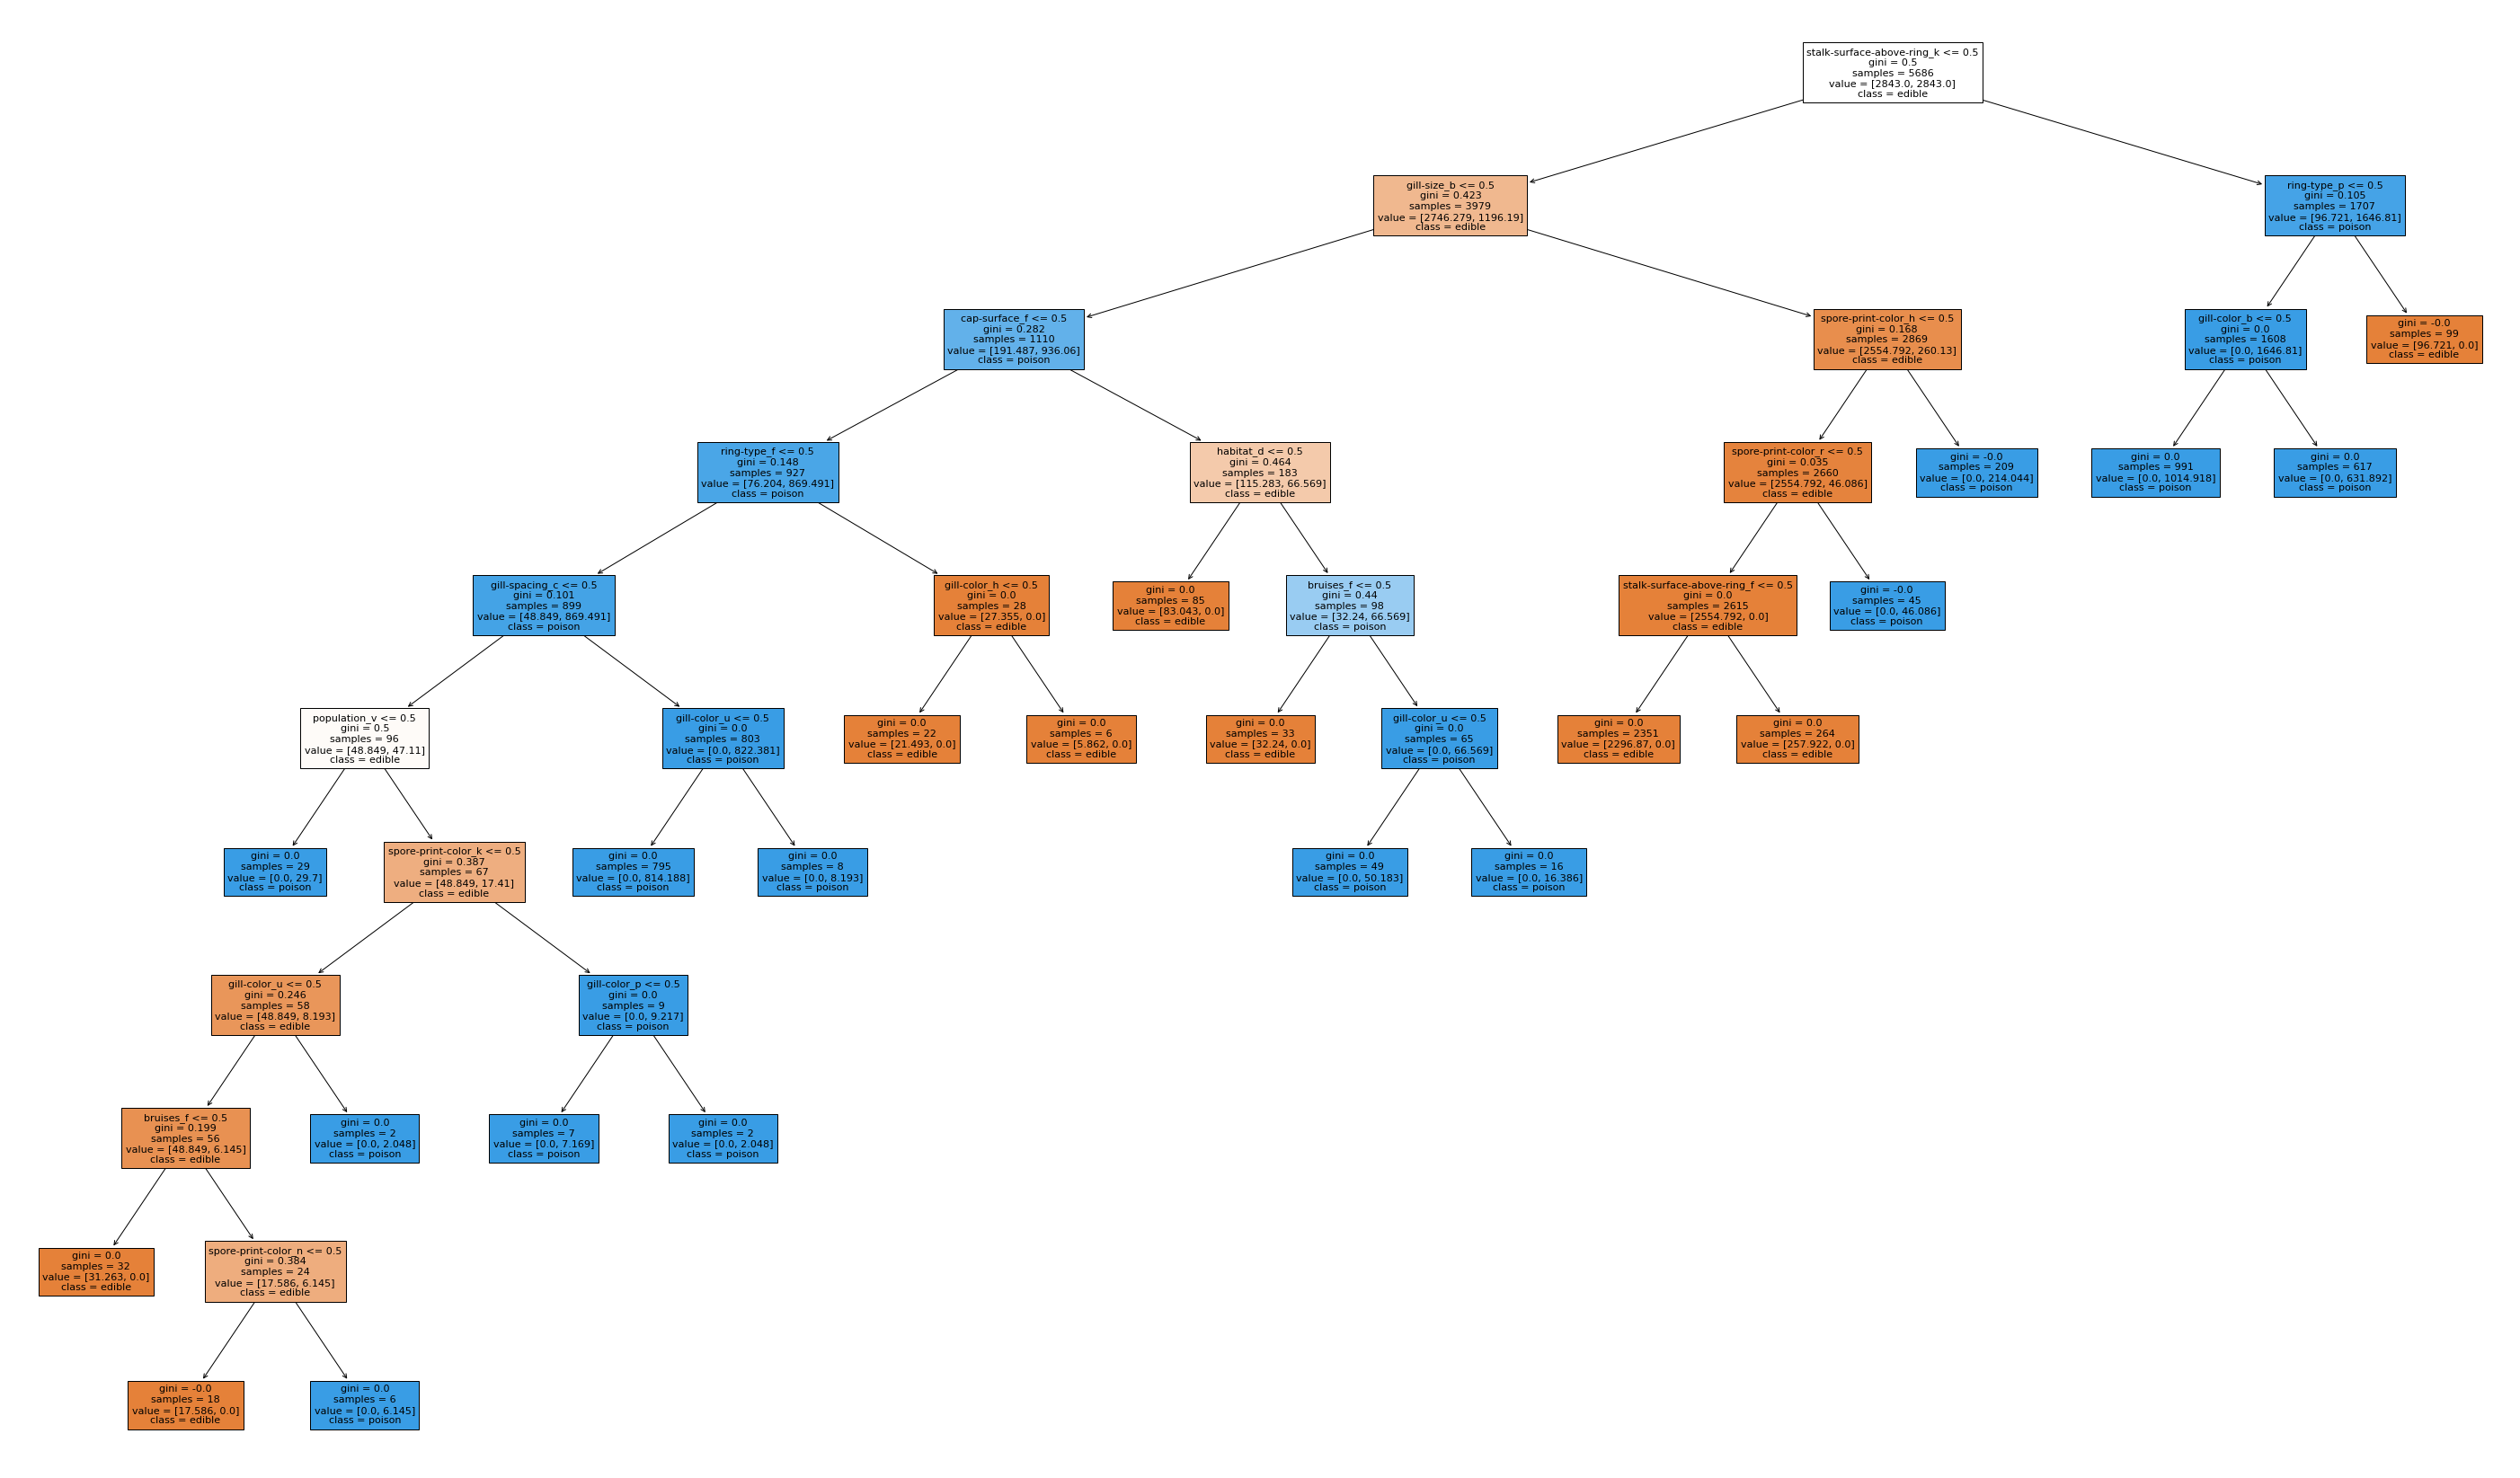

In [29]:
fig = plt.figure(figsize=(50,30))
_ = tree.plot_tree(model, 
                   feature_names=X_test.columns,  
                   class_names=["edible", "poison"],
                   filled=True)
from google.colab import files
plt.savefig("abc.png", transparent=True)
files.download("abc.png") 

In [30]:
y_pred = model.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1298    0]
 [   0 1140]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1298
           1       1.00      1.00      1.00      1140

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



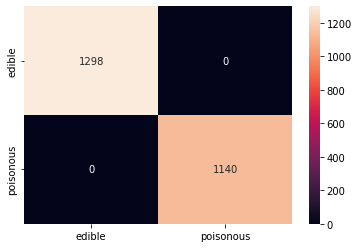

In [31]:
hm = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="g",
            xticklabels=['edible', 'poisonous'],
            yticklabels=['edible', 'poisonous'])
plt.savefig('hm1.png')

## Random Forest

In [32]:
from sklearn.ensemble import RandomForestClassifier

parameters2 = {
              'criterion' :['gini', 'entropy'],
              'min_samples_split':[2, 3, 4, 5], 
              'max_depth':[1, 2, 3, 4, 5, 6, 7, 8],
              'class_weight':('balanced', None),
             }

rf = RandomForestClassifier()
gsearch2 = GridSearchCV(rf, parameters2)
gsearch2.fit(X_train, y_train)
model2 = gsearch2.best_estimator_
model2

RandomForestClassifier(class_weight='balanced', max_depth=7,
                       min_samples_split=3)

In [34]:
y_pred2 = model2.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred2))
print(classification_report(y_test, y_pred2))

[[1298    0]
 [   0 1140]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1298
           1       1.00      1.00      1.00      1140

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



In [35]:
fitur2 = model2.feature_names_in_
importance2 = model2.feature_importances_

fitur_importance2 = {'Fitur': fitur2, 'Importance Values': importance2}
fitur_importance_df2 = pd.DataFrame(data=fitur_importance2)
fitur_importance_df2.sort_values(by=['Importance Values'], ascending=False)

,Fitur,Importance Values
32,spore-print-color_h,0.116181
23,stalk-surface-above-ring_k,0.093475
8,gill-size_b,0.085065
30,ring-type_p,0.076969
9,gill-size_n,0.073756
10,gill-color_b,0.058558
5,bruises_t,0.050285
4,bruises_f,0.045019
6,gill-spacing_c,0.040991
28,ring-type_l,0.038339


# Tindak Lanjut Akurasi 100%


## Bagi data menjadi 10

In [ ]:
#part 1
split1 = data.sample(frac=0.1)
tdata = data.drop(split1.index)

#part 2
split2 = data.sample(frac=0.1)
tdata = data.drop(split2.index)

#part 3
split3 = data.sample(frac=0.1)
tdata = data.drop(split3.index)

#part 4
split4 = data.sample(frac=0.1)
tdata = data.drop(split4.index)

#part 5
split5 = data.sample(frac=0.1)
tdata = data.drop(split5.index)

#part 6
split6 = data.sample(frac=0.1)
tdata = data.drop(split6.index)

#part 7
split7 = data.sample(frac=0.1)
tdata = data.drop(split7.index)

#part 8
split8 = data.sample(frac=0.1)
tdata = data.drop(split8.index)

#part 9
split9 = data.sample(frac=0.1)
tdata = data.drop(split9.index)

#part 10
split10 = tdata

## Pembagian data uji dan latih

## Training data

## Uji data

## Conclusion